TO DO
:analyze iris.csv


https://gist.github.com/netj/8836201



---


 **DecisionTree Classification with Multiple Labels using Scikit-learn**


---



In [3]:
import numpy as np
from sklearn import  datasets
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier



**Loading data**

In [2]:
#TO DO
iris = datasets.load_iris()
print(type(iris))
print(iris)



<class 'sklearn.utils.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
    

**Exploring the data**

In [3]:
#TO DO:
# print data(feature)shape
#X
print(iris.data.shape)
# print target(or label)shape
#y
print(iris.target_names)

# print the names of the features
print(iris.feature_names)

print(iris.target)

(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Splitting the data**

In [4]:
#TO DO:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=6)

# Split dataset into training set and test set #hold-out with various splits #random_state
# 70% training and 30% test

In [5]:
#TO DO: check training dataset shape 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


**Model Generation**

In [6]:
#TO DO:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train, y_train)


**Model visualization**

_This 2 next lines only if you are on a local jupyter notebook without `pydotpuls` and `graphviz`_

In [ ]:
!sudo apt-get update && sudo apt-get install graphviz

In [7]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 6.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=494ebad295ebc28aaff117f3c48cc30e8dc9320f0da276549e80264c7e45f382
  Stored in directory: /home/jovyan/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


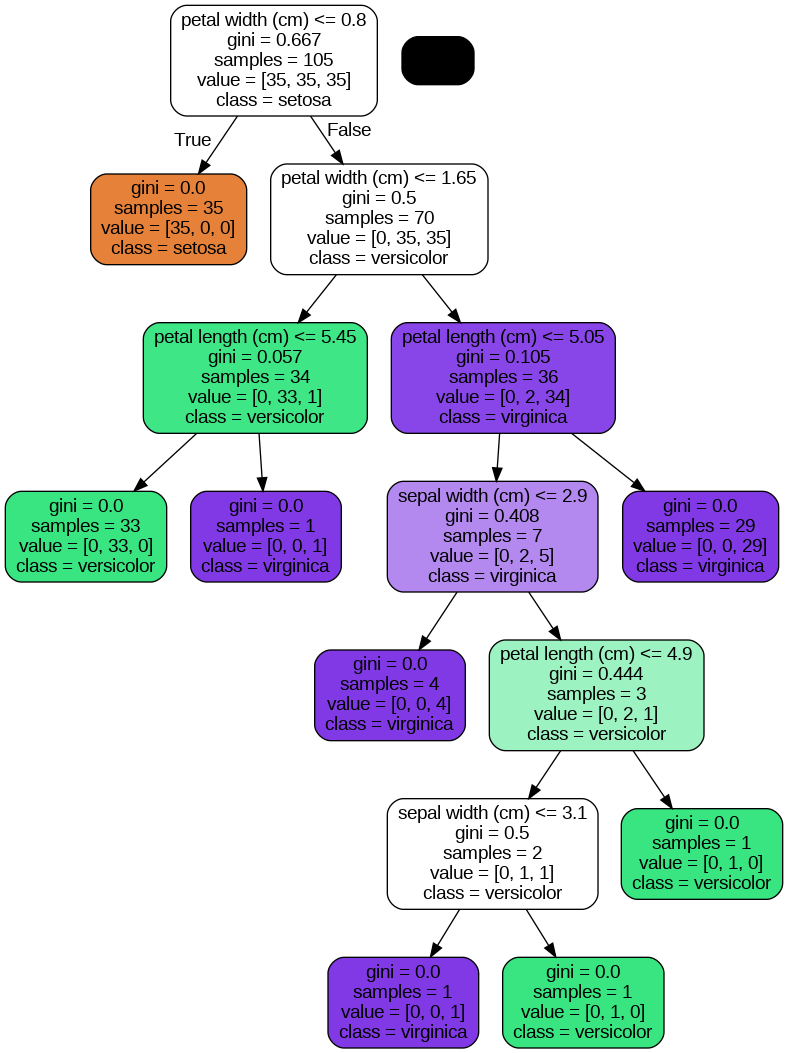

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt,
            out_file =  dot_data,
            feature_names = list(iris.feature_names),
            class_names = iris.target_names,
            filled = True,
            rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('my_Tree_4.png')
Image(graph.create_png())
#Evenly distributed would be 1 – (1/# Classes).
#max_gini = 1- (1/len(iris.target_names))
#print(max_gini)

**Making predictions**

In [11]:
#TO DO:
# Making a Prediction On a New Sample
sample_one_pred = dt.predict(X_test[0:2,:])

#print(X_test[0:2,:])
#print(sample_one_pred)

print(f"The first sample most likely belongs to the {iris.target_names[sample_one_pred]} iris class.")

sample_two_pred = dt.predict([[1.5, 2, 1.1, 0.6]])
#print(sample_two_pred)
print(f"The second sample most likely belongs to the {iris.target_names[sample_two_pred]} iris class.")

#predict probability
sample_three_pred = dt.predict_proba(X_test[0:2,:])
print(sample_three_pred)

The first sample most likely belongs to the ['setosa' 'virginica'] iris class.
The second sample most likely belongs to the ['setosa'] iris class.
[[1. 0. 0.]
 [0. 0. 1.]]


**Model evalution: accuracy**
TO DO:
how to evaluate?what is accuracy?

In [48]:
#Import scikit-learn metrics module for accuracy calculation
#Model Accuracy, how often is the classifier correct?

#Predict the response for test dataset
y_pred = dt.predict(X_test)
print(y_pred)
print(y_test)

print("accuracy on test: ", metrics.accuracy_score(y_test, y_pred))

#Predict the response for train dataset
y_pred = dt.predict(X_train)
print("accuracy on train: ", metrics.accuracy_score(y_train, y_pred))

[0 2 0 0 2 1 1 0 2 1 2 1 2 2 1 1 2 1 1 0 0 2 0 0 1 1 1 2 0 1 0 1 0 0 1 2 1
 2 1 0 0 2 1 1 0]
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1 0 1 0 0 2 2 1
 2 1 0 0 2 1 1 0]
accuracy on test:  0.9333333333333333
accuracy on train:  1.0


**Cross-validation**

In [49]:
#TO DO: import cross_val_score metric and perform cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(dt, iris.data, iris.target, cv=10)

#compute mean accuracy value

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

**Confusion matrix and classification report**
explain confusion matrix from documentation

In [50]:
#TO DO: compute the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)

confusion_matrix(y_test, y_pred)



array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]])

**Plotting the confusion matrix**

confusion matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


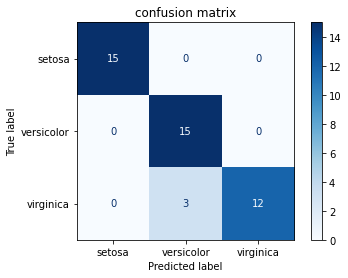

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
class_names = iris.target_names
title = "confusion matrix"
#for title, normalize in titles_options:
disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None) #normalize =None
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

**KNN classifier**

**Exploring the WINE dataset**

In [13]:
#TO DO
wine = datasets.load_wine()

# TO DO print the names of the features
print(wine.feature_names)
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

print(wine.data)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [16]:
# TODO: print the wine data (first 5 records)and get min and max values
print(wine.data[0:5])
#TO DO: print the min and max attribute value
print("min: ", np.min(wine.data))
print("max: ", np.max(wine.data))

# print data(feature)shape
print(wine.data.shape)
# print target(or label)shape
print(wine.target.shape)

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
min:  0.13
max:  1680.0
(178, 13)
(178,)


In [17]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)
print(type(wine.target))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'>


**Splitting the data**

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# TO DO: Split dataset into training set and test set
X_ref, X_test, y_ref, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=6)
print(X_ref.shape, X_test.shape, y_ref.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [21]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#TO DO: Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#TO DO: Prepare the model using the reference set
knn = knn.fit(X_ref, y_ref)

#TO DO: Predict the response for test dataset
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 1 2 0 1 1 1 0 0 2 2 2 2 0 0 0 1 1 1 1 0 0 1 1 0 2 0 2 0 2 1 1 0 1 1
 1 0 2 0 2 2 2 1 0 0 1 1 1 0 0 1 2]


**Making predictions**

In [24]:
new_wine = [[1,2,3,1,1,4,2,3,4,5,6,7,2]]
y_predict = knn.predict(new_wine)
print(y_predict)

y_predict_proba = knn.predict_proba(new_wine)
print(y_predict_proba)

classes= {0:"class_1", 1: "class_2", 2:"class_3"}
print(classes[y_predict[0]])

y_predict = knn.predict(X_test[:5])
print(y_predict)

[1]
[[0. 1. 0.]]
class_2
[0 1 1 1 2]


**Model evaluation**

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#TO DO: Predict the response for test dataset
y_pred = knn.predict(X_test)
print(y_pred)
#TO DO:  Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[0 1 1 1 2 0 1 1 1 0 0 2 2 2 2 0 0 0 1 1 1 1 0 0 1 1 0 2 0 2 0 2 1 1 0 1 1
 1 0 2 0 2 2 2 1 0 0 1 1 1 0 0 1 2]
Accuracy: 0.6851851851851852


**Another KNN classifier**

In [27]:
#Import knearest neighbors Classifier model
#from sklearn.neighbors import KNeighborsClassifier

#TO DO : Create another KNN Classifier with different n_neighbors
knn_second = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn_second = knn_second.fit(X_ref, y_ref)

#Predict the response for test dataset
y_pred_second = knn_second.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_second))

Accuracy: 0.7407407407407407


**Creating various classifiers with different k values and plot the accuracy**

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
#TO DO: 
def find_best_k_value(data_ref, label_ref, data_test, label_test, max_k):
    score_list = []
    for k in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn = knn.fit(data_ref, label_ref)
        y_pred = knn.predict(data_test)
        score_list.append(metrics.accuracy_score(label_test, y_pred))
        
    plt.plot(range(1, max_k), score_list)
    plt.xlabel("values of k for KNN")
    plt.ylabel("testing accuracy values")

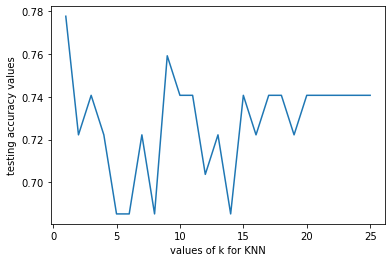

In [31]:
#TO DO: call find_best_k_values function
find_best_k_value(X_ref, y_ref, X_test, y_test, 26)

In [32]:
#Recall min and max attribute values
print(np.max(wine.data, axis = 0))
print(np.min(wine.data, axis = 0))

[1.483e+01 5.800e+00 3.230e+00 3.000e+01 1.620e+02 3.880e+00 5.080e+00
 6.600e-01 3.580e+00 1.300e+01 1.710e+00 4.000e+00 1.680e+03]
[1.103e+01 7.400e-01 1.360e+00 1.060e+01 7.000e+01 9.800e-01 3.400e-01
 1.300e-01 4.100e-01 1.280e+00 4.800e-01 1.270e+00 2.780e+02]


In [34]:
#TO DO : modify data values
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_min_max = minmax.fit_transform(wine.data)


print(data_min_max)
print(np.max(data_min_max, axis = 0))
print(np.min(data_min_max, axis = 0))

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


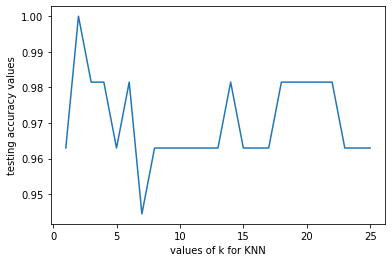

In [35]:
#TO DO : redo splitting
X_ref_MM, X_test_MM, y_ref_MM, y_test_MM = train_test_split(data_min_max, wine.target, test_size=0.3, random_state=6)

#TO DO: find best k value for the modified dataset
find_best_k_value(X_ref_MM,y_ref_MM, X_test_MM, y_test_MM, max_k=26)

**Model evalution: other metrics**

**Precision score**:       
   P = $ \frac{T_p}{T_p + F_p}$, 
where $T_p$ is the number of true positives and $F_p$ the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

**Recall score**:    
R = $ \frac{T_p}{T_p + F_n}$, 
where $T_p$ is the number of true positives and $F_n$ the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

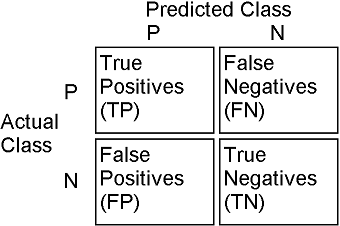


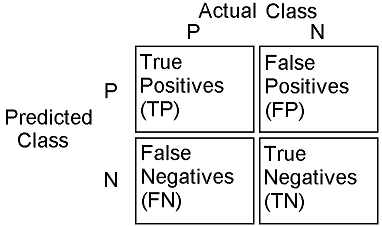

In [38]:
#TO DO : 
y_pred = knn.predict(X_test)


# TO DO: Compute the recall score
from sklearn.metrics import recall_score, precision_score  #weighted vs macro
macro_recall = recall_score(y_test, y_pred, average="macro")
print('Macro recall score: {0:0.2f}'.format(macro_recall))

w_recall = recall_score(y_test, y_pred, average="weighted")
print('weighted recall score: {0:0.2f}'.format(w_recall))

#TO DO : Compute the precision score
w_precision = precision_score(y_test, y_pred, average="weighted")
print('weighted precision score: {0:0.2f}'.format(w_precision))

macro_precision = precision_score(y_test, y_pred, average="macro")
print('macro precision score: {0:0.2f}'.format(macro_precision))



Macro recall score: 0.65
weighted recall score: 0.69
weighted precision score: 0.69
macro precision score: 0.65


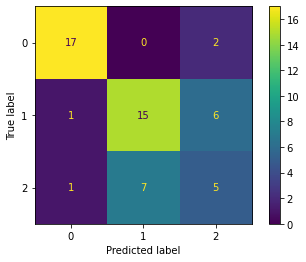

In [40]:
#TO DO
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [43]:
# import numpy as np
# import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
# # Plot non-normalized confusion matrix
# class_names = wine.target_names
# title = "Normalized confusion matrix"
# #for title, normalize in titles_options:
# disp = plot_confusion_matrix(knn, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize="true")
# disp.ax_.set_title(title)

# print(title)
# print(disp.confusion_matrix)

# plt.show()

**Naive Bayes**

In [4]:
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
#print(iris.data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=109) # 70% training and 30% test

**Model creation**

In [5]:
from sklearn.naive_bayes import GaussianNB

#TO DO: Create a Gaussian Classifier
gnb = GaussianNB()

#TO DO :Train the model using the training sets
gnb = gnb.fit(X_train, y_train)

#TO DO: Predict the response for test dataset
y_pred = gnb.predict(X_test)

# TO DO: Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [46]:
from sklearn.naive_bayes import BernoulliNB

#TO DO Create a Bernoulli Classifier
bNB = BernoulliNB(binarize=1.5)

#TO DO Train the model using the training sets
bNB = bNB.fit(X_train, y_train)

#TO DO Predict the response for test dataset
y_pred = bNB.predict(X_test)

# TO DO Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8444444444444444


In [11]:
from sklearn.metrics import recall_score, precision_score
y_pred = gnb.predict(X_test)
y_score = gnb.score(X_test, y_test)
print('Accuracy: ', y_score)

#TO DO : per class_precision and per_class_recall
per_class_precision = precision_score(y_test, y_pred, average=None)
print('Per-class precision score:', per_class_precision)

per_class_recall = recall_score(y_test, y_pred, average=None)
print('Per-class recall score:', per_class_recall)

# TO DO : Compute the average recall score and average precision score

w_recall = recall_score(y_test, y_pred, average="weighted")
print('weighted-averaged recall score: {0:0.2f}'.format(w_recall))

macro_recall = recall_score(y_test, y_pred, average="macro")
print('Macro-averaged recall score: {0:0.2f}'.format(macro_recall))

macro_precision = precision_score(y_test, y_pred, average="macro")
print('Macro-averaged precision score: {0:0.2f}'.format(macro_precision))

w_precision = precision_score(y_test, y_pred, average="weighted")
print('weighted-averaged precision score: {0:0.2f}'.format(w_precision))

#TO DO: further investigation of the classifier : how? 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy:  0.9555555555555556
Per-class precision score: [1.         0.94117647 0.9375    ]
Per-class recall score: [1.         0.94117647 0.9375    ]
weighted-averaged recall score: 0.96
Macro-averaged recall score: 0.96
Macro-averaged precision score: 0.96
weighted-averaged precision score: 0.96


array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 15]])

**Decision Boundary**

_This next line only if you are on a local jupyter notebook and you dont have mlxtend_

In [ ]:
!pip install mlxtend

Text(0.5, 1.0, 'GNB')

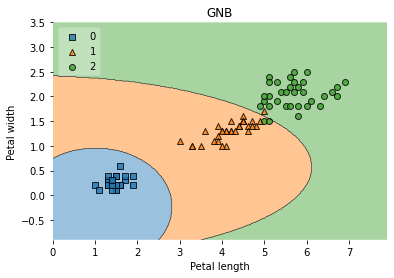

In [53]:
#TO DO: plot the decision boundary 
from sklearn.naive_bayes import GaussianNB

#TO DO: Create a Gaussian Classifier
gnb = GaussianNB()

#TO DO :Train the model using the training sets
gnb = gnb.fit(X_train[:,2:4], y_train)

from mlxtend.plotting import plot_decision_regions
#TO D: Plotting decision region

plot_decision_regions(X_train[:,2:4], y_train, clf = gnb, legend = 2)
plt.xlabel('Petal length') # Adding axes annotations
plt.ylabel('Petal width')
plt.title('GNB')